In [33]:
import pandas as pd
import orodja
%matplotlib inline

In [34]:
izleti = pd.read_csv("izleti.csv", encoding='utf-8')

# Izleti na slovenske dvatisočake
Kot zaveden Slovenec se zavedam edinstvenosti slovenskega pogorja, danosti, ki je nima vsak narod. Doma sem s praga Alp, ki gostijo vse dvatisočake na našem ozemlju, in sem navdušen pohodnik, zato rad uporabljam spletni portal hribi.net, kjer so uporabni opisi dostopov na vse slovenske in okoliške bisere. Ker Šmarna gora ni gora, sem se pri razčlenjevanju podatkov omejil na izlete, ki nas ponesejo nad dvokilometrsko mejo nad morjem.

Na začetku sem pomislil, kakšne informacije bi me kot pohodnika zanimale. Zagotovo najprej pogledamo cilj in izhodišče, nadmorsko višino, višino izhodišča in izračunamo višinsko razliko (pri mnogih izletih to ni edina višinska razlika, ki jo je treba premagati, zato nam hribi.net ponudijo tudi višinsko razliko po poti, ki vključuje vmesne vzpone in spuste). Poleg osnovnih podatkov pa me je zanimalo, kako določeno pot (ne samo cilj, ta ni prvotnega pomena) vidimo planinci, zato sem s spleta prenesel še podatke o številu ogledov posameznega izleta in oceni (da bi zagotovil primerno zadržanost do podatkov sem moral dodati tudi število ocen). Temu sem dodal še vrsto cilja, časovno vrednost dolžine poti in zemljepisne koordinate cilja.

Moj namen je analizirati zahtevnosti poti (glede na nadmorsko višino), poiskati najbolj prepredena alpska območja, njihovo zanimivost za planince (glede na višinsko razliko, čas hoje, lokacijo, vrsto cilja ...) in druge zanimive podatke.

In [35]:
izleti.head(10)

,gorovje,izhodišče,višina_izhodišča,cilj,višina_cilja,opomba_poti,čas_hoje,zahtevnost,višinska_razlika_po_poti,število_ogledov,ocena,število_glasov,širina_cilja,dolžina_cilja,vrsta_cilja
0,Julijske Alpe,Stara Fužina,600,Triglav,2864,čez Planiko in Triglavsko škrbino,450,zelo zahtevna označena pot,2264,19345,7,1,"46,37832","13,83648","vrh, bivak"
1,Julijske Alpe,Rudno polje,1347,Triglav,2864,čez Kredarico,380,zelo zahtevna označena pot,1900,74961,9,4,"46,37832","13,83648","vrh, bivak"
2,Julijske Alpe,Aljažev dom v Vratih,1015,Triglav,2864,Tominškova pot,350,zelo zahtevna označena pot,1849,219792,8,13,"46,37832","13,83648","vrh, bivak"
3,Julijske Alpe,Aljažev dom v Vratih,1015,Triglav,2864,čez Prag,360,zelo zahtevna označena pot,1850,123470,9,12,"46,37832","13,83648","vrh, bivak"
4,Julijske Alpe,Aljažev dom v Vratih,1015,Triglav,2864,čez Plemenice,390,zelo zahtevna označena pot,1849,118601,9,13,"46,37832","13,83648","vrh, bivak"
5,Julijske Alpe,Dolina Kot,950,Triglav,2864,NaN,360,zelo zahtevna označena pot,2050,41559,8,8,"46,37832","13,83648","vrh, bivak"
6,Julijske Alpe,Dolina Krma,930,Triglav,2864,čez Kredarico,360,zelo zahtevna označena pot,1934,112269,8,5,"46,37832","13,83648","vrh, bivak"
7,Julijske Alpe,Dolina Krma,930,Triglav,2864,čez Planiko in Mali Triglav,360,zelo zahtevna označena pot,1934,114066,9,7,"46,37832","13,83648","vrh, bivak"
8,Julijske Alpe,Dolina Krma,930,Triglav,2864,čez Planiko in Triglavsko škrbino,345,zelo zahtevna označena pot,1934,34269,8,4,"46,37832","13,83648","vrh, bivak"
9,Julijske Alpe,Konec ceste na Pokljuki,1340,Triglav,2864,čez Kredarico,360,zelo zahtevna označena pot,1650,50305,9,7,"46,37832","13,83648","vrh, bivak"


## Nekaj osnovnih podatkov o pristopih na gore

### Število izletov v posameznem gorovju

In [36]:
izleti.groupby('gorovje').size()

gorovje
Julijske Alpe              551
Kamniško Savinjske Alpe    236
Karavanke                  147
dtype: int64

### Cilji z največ možnimi potmi

In [37]:
st_poti_na_cilj = izleti.groupby('cilj').size()
st_poti_na_cilj.sort_values(ascending=False).head(15)

cilj
Storžič                     30
Triglav                     26
Viševnik                    21
Stol                        20
Ojstrica                    17
Prešernova koča na Stolu    14
Begunjščica                 14
Kordeževa glava (Peca)      14
Grintovec                   14
Jezerska Kočna              14
Debela peč                  13
Kalški greben               13
Planjava                    12
Krn                         12
Prisank / Prisojnik         12
dtype: int64

## Višinska razlika

In [38]:
izleti["višinska_razlika"] = izleti["višina_cilja"] - izleti['višina_izhodišča']

In [39]:
izleti.sort_values(
    'višinska_razlika', ascending=False
).head(15)[
    ['izhodišče','višina_izhodišča', 'cilj', 'višina_cilja', 'višinska_razlika', 'opomba_poti']
]

,izhodišče,višina_izhodišča,cilj,višina_cilja,višinska_razlika,opomba_poti
22,Srednja vas,583,Triglav,2864,2281,Za Ribnico in čez Triglavsko škrbino
12,Stara Fužina,600,Triglav,2864,2264,čez Planiko in Mali Triglav
0,Stara Fužina,600,Triglav,2864,2264,čez Planiko in Triglavsko škrbino
13,Zadnjica,650,Triglav,2864,2214,čez Plemenice
16,Zadnjica,650,Triglav,2864,2214,čez Komar
14,Zadnjica,650,Triglav,2864,2214,čez Dolič
18,Koča pri Savici,653,Triglav,2864,2211,čez Triglavska jezera
197,Zadnjica,650,Škrlatica,2740,2090,NaN
198,Gozd Martuljek,750,Škrlatica,2740,1990,grebensko prečenje Mali Oltar-Škrlatica
533,Zadnjica,650,Razor,2601,1951,NaN


### Povprečna višinska razlika pri pristopu na posamezno goro

In [40]:
izleti.groupby('cilj').mean()['višinska_razlika'].sort_values(ascending=False).round(decimals=1)

cilj
Škrlatica                              1886.2
Triglav                                1877.8
Mišeljski Konec                        1814.0
Mala Martuljška Ponca                  1751.0
Široka peč                             1747.0
Mali Triglav                           1731.7
Visoki Rokav                           1705.0
Morbegna                               1704.3
Mišelj vrh                             1700.0
Glava v Zaplanji                       1690.5
Kanjavec (Zahodni vrh)                 1670.5
Veliki Oltar                           1650.5
Briceljk                               1648.0
Mali Ozebnik                           1626.0
Kanjavec                               1619.5
Dolkova špica                          1612.0
Kukova špica                           1607.0
Grintovec                              1603.6
Plaski Vogel                           1603.0
Velika Martuljška Ponca                1602.0
Dovški križ                            1601.0
Stenar                       

## Višinska razlika po poti

### Povprečna višinska razlika po poti pri izletu na posamezno goro

In [41]:
izleti.groupby('cilj').mean()['višinska_razlika_po_poti'].sort_values(ascending=False).round(decimals=1).head(15)

cilj
Škrlatica                  2572.5
Triglav                    2057.8
Morbegna                   1833.3
Mišelj vrh                 1825.0
Mišeljski Konec            1815.0
Mala Martuljška Ponca      1800.0
Velika Martuljška Ponca    1800.0
Kanjavec                   1781.9
Glava v Zaplanji           1775.2
Mali Triglav               1773.3
Široka peč                 1750.0
Veliki Oltar               1750.0
Razor                      1735.6
Kanjavec (Zahodni vrh)     1727.5
Skuta                      1724.7
Name: višinska_razlika_po_poti, dtype: float64

In [42]:
izleti.groupby('cilj').mean()['višinska_razlika_po_poti'].sort_values(ascending=False).round(decimals=1).tail(15)

cilj
Velika Mojstrovka               800.0
Zadnja Mojstrovka               800.0
Toplar                          786.0
Veliki vrh (Veža)               737.5
Velika Zelenica                 726.2
Brda                            716.4
Mala Ojstrica                   700.0
Konjc                           685.0
Dom Petra Skalarja na Kaninu    685.0
Molička peč                     608.3
Mali Kanin                      600.0
Suhi vrh                        600.0
Pungartska gora                 595.0
Mala Raduha                     529.0
Šitna glava                     476.0
Name: višinska_razlika_po_poti, dtype: float64

## Zahtevnosti poti

### Zahtevnost poti po gorovjih

Ogledali si bomo, kakšnih poti je po posameznem gorovju največ in kakšna je "povprečna zahtevnost" poti po gorovjih. Naj omenim, da ena pot sovpada z enim izletom.

In [43]:
izleti['zahtevnost_št'] = izleti['zahtevnost'].apply(orodja.pretvori_zahtevnost)

#### Julijske Alpe

Zanima nas, kakšnih poti je po Slovenskih Julijcih največ

In [44]:
julijci = izleti[izleti['gorovje']=='Julijske Alpe']
julijci['zahtevnost'].value_counts().argmax()

'zelo zahtevna označena pot'

Frekvenca zelo zahtevnih označenih poti v Julijskih Alpah pa preberemo:

In [45]:
julijci.groupby('zahtevnost').size().max()

107

Izračunajmo "povprečno zahtevnost" poti po Julijcih:

In [46]:
orodja.pretvori_stevilo(round(julijci['zahtevnost_št'].mean()))

'zahtevna pot'

#### Karavanke

V Karavankah je najpogostejša pot:

In [47]:
karav = izleti[izleti['gorovje']=='Karavanke']
karav['zahtevnost'].value_counts().argmax()

'lahka označena pot'

Takih poti je

In [48]:
karav.groupby('zahtevnost').size().max()

38

Povprečna zahtevnost je

In [49]:
orodja.pretvori_stevilo(round(karav['zahtevnost_št'].mean()))

'delno zahtevna pot'

#### Kamniško Savinjske Alpe

Najpogostejša pot:

In [50]:
ksa = izleti[izleti['gorovje']=='Kamniško Savinjske Alpe']
ksa['zahtevnost'].value_counts().argmax()

'zelo zahtevna označena pot'

Takih poti je

In [51]:
ksa.groupby('zahtevnost').size().max()

73

Povprečna zahtevnost:

In [52]:
orodja.pretvori_stevilo(round(ksa['zahtevnost_št'].mean()))

'zahtevna pot'

### Zahtevnost pristopov na goro

Zanima nas, kakšna pot je najenostavnejša pri vzponu na goro.

In [53]:
izleti.groupby('cilj').min()['zahtevnost_št'].sort_values().apply(orodja.pretvori_stevilo)

cilj
Lanževica                              lahka pot
Velika Zelenica                        lahka pot
Malo Špičje                            lahka pot
Mali vrh                               lahka pot
Velika Zelnarica                       lahka pot
Velika glava                           lahka pot
Mala Zelnarica                         lahka pot
Mala Tičarica                          lahka pot
Mala Raduha                            lahka pot
Mala Ojstrica                          lahka pot
Velika Raduha                          lahka pot
Mahavšček                              lahka pot
Lopatnik                               lahka pot
Veliki vrh (Košuta)                    lahka pot
Veliki vrh (Veža)                      lahka pot
Veliko Kladivo                         lahka pot
Krn                                    lahka pot
Kreda                                  lahka pot
Visoka Vrbanova špica                  lahka pot
Viševnik                               lahka pot
Koča na Doliču 

Vidimo, da na Kokrsko Kočno, Rigljico in Spodnji Rokav ne moremo priti drugače kot po alpinističnem vzponu.

## Označenost poti

In [54]:
izleti['označenost_št'] = izleti['zahtevnost'].apply(orodja.oznacenost)
izleti['označenost'] = izleti['zahtevnost'].apply(orodja.oznacenost).apply(orodja.pretvori_oznacenost)

#### Pristopi na gore glede na najboljšo označenost

In [55]:
izleti.groupby('cilj').min()['označenost_št'].apply(orodja.pretvori_oznacenost)

cilj
Ablanca                                neoznačena pot
Adam                                        brezpotje
Batognica                                označena pot
Bavški Grintavec                         označena pot
Begunjski vrh                            označena pot
Begunjščica                              označena pot
Bivak na Jezerih                       neoznačena pot
Bivak pod Grintovcem                     označena pot
Bivak pod Skuto                        neoznačena pot
Bovški Gamsovec                          označena pot
Brana                                    označena pot
Brda                                     označena pot
Briceljk                               neoznačena pot
Cesar                                       brezpotje
Cmir                                     označena pot
Debela peč                               označena pot
Debeli vrh                                  brezpotje
Dolgi hrbet                              označena pot
Dolkova špica          

In [56]:
st_oznacenosti_glede_na_cilj = pd.crosstab(
    izleti.označenost,
    izleti.cilj
)

tabela1 = st_oznacenosti_glede_na_cilj / st_poti_na_cilj
tabela2 = tabela1.transpose()

oznacenost_cilja = tabela2['označena pot']
izleti = izleti.join(oznacenost_cilja, on='cilj')

V zadnjem koraku smo tabeli izletov dodali delež označenih poti na cilj izleta (v stolpcu 'označena pot'). To bomo uporabili kasneje, ko bomo računali označenost poti na cilje glede na višinsko razliko.

Za vsak cilj ugotovimo še, ali nanj vodi kakšna označena pot.

In [58]:
def oznaci(stev):
    if stev > 0:
        return True
    else:
        return False

cilji = izleti.groupby('cilj')['višina_cilja'].mean().to_frame()
cilj_je_dostopen = oznacenost_cilja.apply(oznaci).to_frame()
dostopnost_cilja = cilji.join(cilj_je_dostopen)
dostopnost_cilja

,višina_cilja,označena pot
cilj,,
Ablanca,2004.0,False
Adam,2012.0,False
Batognica,2164.0,True
Bavški Grintavec,2347.0,True
Begunjski vrh,2461.0,True
Begunjščica,2060.0,True
Bivak na Jezerih,2118.0,False
Bivak pod Grintovcem,2100.0,True
Bivak pod Skuto,2070.0,False


## Analiza podatkov glede na različne vrste višin

In [59]:
izleti['hitrost'] = izleti.višinska_razlika / izleti.čas_hoje

Ker ne analiziram gora, marveč poti nanje, se bom osredinil na razrede, ki nastanejo po delitvi izletov glede na njihovo nadmorsko višino in, kadar bo situacija tako nanesla, uporabil tudi delitev glede na nadmorsko višino cilja.

Najprej si oglejmo, koliko je sploh izletov v posameznem razredu. Pričakujemo, da bo malo izletov z zelo majhno višinsko razliko, saj je malo izhodišč z nadmorsko višino okrog 2000 m. Prav tako najbrž ne bo veliko izletov z višinsko razliko nad 2000 m, saj bi to pomenilo, da se moramo vzpeti na dvatisočak od zelo daleč (blizu tako visoke gore so tudi izhodišča visoka).

In [108]:
izleti['višinski_razred'] = (izleti['višinska_razlika'] // 100) * 100

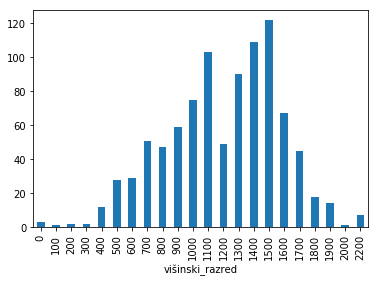

In [61]:
razredi = izleti.groupby('višinski_razred')
razredi.size().plot.bar()

Vidimo, da je največ izletov z višinsko razliko okrog 1500 m in je res malo skrajnih vrednosti.


Zdaj nas zanima, kako hitro prelezemo neko višinsko razliko. Pričakujemo, da bomo večje višinske razlike premagovali hitreje, saj bo pot strmejša in bomo hitreje dobivali višino. Spodnji graf prikazuje, koliko višinskih metrov naredimo na minuto.

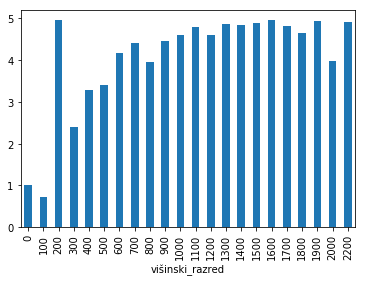

In [62]:
razredi.mean()['hitrost'].plot.bar(y='višinski_metri_na_minuto')

Očitno je, da pri majhnih višinskih razlikah višino pridobivamo počasi, saj se gibljemo bolj vodoravno. Opazimo tudi, da so poleg teh odstopanj hitrosti precej podobne, kar lahko kaže na to, da je čas hoje na hribi.net preračunan glede na višinsko razliko.

Zdaj nas zanima, kako dobro so označene poti v posameznem razredu nadmorske višine cilja. Cilji so razdeljeni v razrede nadmorskih višin, graf pa prikazuje, na kolikšen delež ciljev v posameznem razredu vodi označena pot.

In [74]:
izleti['razred_cilja'] = (izleti.višina_cilja // 100) * 100

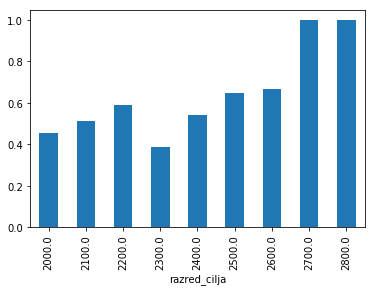

In [66]:
dostopnost_cilja['razred_cilja'] = (dostopnost_cilja.višina_cilja // 100) * 100
dostopnost = dostopnost_cilja[
    dostopnost_cilja['označena pot']==True
].groupby('razred_cilja').size() / dostopnost_cilja.groupby('razred_cilja').size()
dostopnost.plot.bar()

Očitno se na vse cilje v razredu 2700 in 2800 (to so le Mali Triglav, Škrlatica in Triglav) lahko povzpnemo po označeni poti.


Spodnji graf prikazuje še število ciljev, na katere vodi označena pot, v posameznem razredu nadmorske višine cilja.

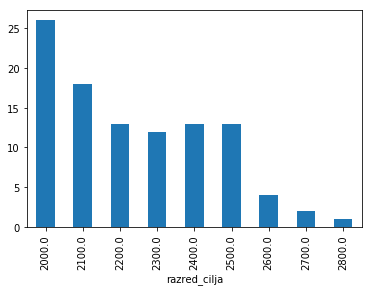

In [67]:
dostopnost_cilja[
    dostopnost_cilja['označena pot']==True
].groupby('razred_cilja').size().plot.bar()

### Zanimanje za posamezen višinski razred

Zdaj nas zanima, koliko je ogledov izletov določenega višinskega razreda. Radi bi videli, o kakšnih izletih se ljudje največkrat pozanimajo. Sklepam, da je največ ogledov tam, kjer je največ izletov, torej okrog višinske razlike 1500, zato bomo izračunali povprečno število ogledov ma izlet glede na višinski razred.

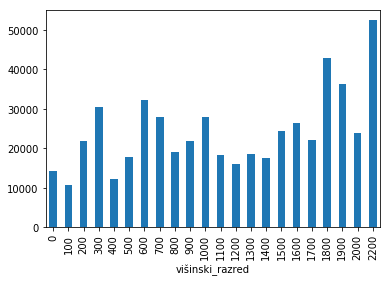

In [94]:
zanimivi = izleti[izleti.število_ogledov > 4000]
zanimivi_razredi = zanimivi.groupby('višinski_razred')
(zanimivi_razredi.sum()['število_ogledov'] / zanimivi_razredi.size()).plot.bar()

Pričakovano je največ zanimanja za izlete z najvišjo višinsko razliko, saj je v tem razredu Triglav, naša najbolj mikavna gora.

Morda bomo lepši vzorec dobili, če izračunamo število ogledov posameznega višinskega razreda cilja.

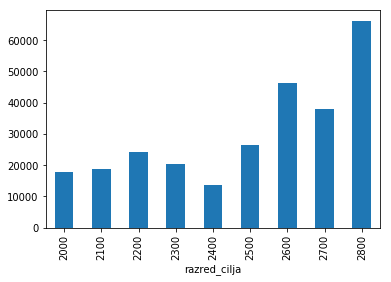

In [92]:
(zanimivi.groupby('razred_cilja').mean()['število_ogledov']).plot.bar()

Tu lepo vidimo, da je največ zanimanja za najvišje izlete, zopet je to pričakovano zaradi Triglava.

Poglejmo si še, kako sta odvisna ocena izleta in višinski razred.

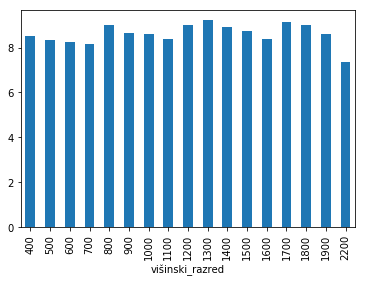

In [116]:
uporabni = izleti[izleti.število_glasov > 4]
uporabni.groupby('višinski_razred').mean()['ocena'].plot.bar()

Ne ravno zanimiv, pa vendar zgovoren zaključek je, da ocena ni preveč odvisna od višinskega razreda.

## Zaključek

Kljub temu da je portal hribi.net precej manj obiskan kot drugi možni viri podatkov, se iz njega da razbrati marsikaj zanimivega.